In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
from tensorflow.keras.preprocessing.image import load_img

In [10]:
!ls

clothing-dataset-small	notebook_deeplearning.ipynb


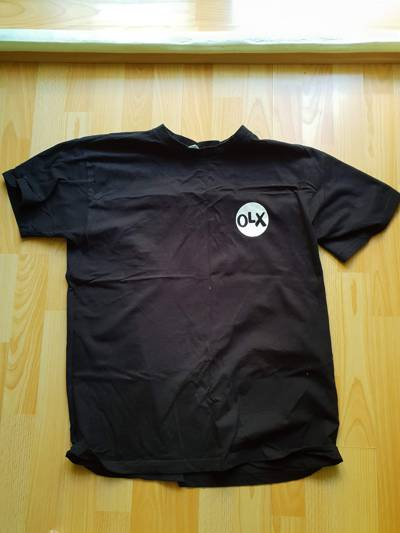

In [11]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

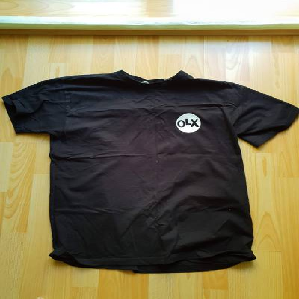

In [12]:
# defauklt size for TensorFlow - resize images
img = load_img(fullname, target_size=(299, 299))
img

In [15]:
print(img) #use PIL to process images

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F188E4BB110>


In [13]:
x = np.array(img) # the image is processed with 3 channels RGD - red, green, blue channel - matrix of numbers (0-255)
x.shape

(299, 299, 3)

In [16]:
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [17]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

# 8.1 Pre-trained convolutional neural networks

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [20]:
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [23]:
X = np.array([x])

In [25]:
X.shape

(1, 299, 299, 3)

In [26]:
X = preprocess_input(X)

In [28]:
X.shape

(1, 299, 299, 3)

In [29]:
pred = model.predict(X)

I0000 00:00:1732710657.417498    1851 service.cc:146] XLA service 0x7f17d400f180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732710657.417531    1851 service.cc:154]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-11-27 12:30:57.453086: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-27 12:30:57.804893: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1732710659.672625    1851 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [31]:
pred.shape

(1, 1000)

In [32]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', 0.6819637),
  ('n02916936', 'bulletproof_vest', 0.038139876),
  ('n04370456', 'sweatshirt', 0.03432471),
  ('n03710637', 'maillot', 0.011354209),
  ('n04525038', 'velvet', 0.0018453572)]]

# 8.2 Convolutional neural networks
- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers
There are more layers. Read here: https://cs231n.github.io/

# 8.3 Transfer learning
- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)
(Better to run it with a GPU)

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [35]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [39]:
X, y = next(train_ds)

In [40]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [42]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [43]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [44]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 180ms/step - accuracy: 0.5636 - loss: 1.8833 - val_accuracy: 0.7683 - val_loss: 1.0135
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7969 - loss: 0.6309 - val_accuracy: 0.7713 - val_loss: 0.9141
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8947 - loss: 0.3204 - val_accuracy: 0.7889 - val_loss: 0.8666
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9224 - loss: 0.2054 - val_accuracy: 0.8123 - val_loss: 0.9654
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.9432 - loss: 0.1768 - val_accuracy: 0.8270 - val_loss: 0.8735
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9753 - loss: 0.0845 - val_accuracy: 0.8152 - val_loss: 0.7757
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9732 - loss: 0.0763 - val_accuracy: 0.8006 - val_loss: 0.8688
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.9856 - loss: 0.0571 - val_accuracy: 0.8211 - val_loss: 

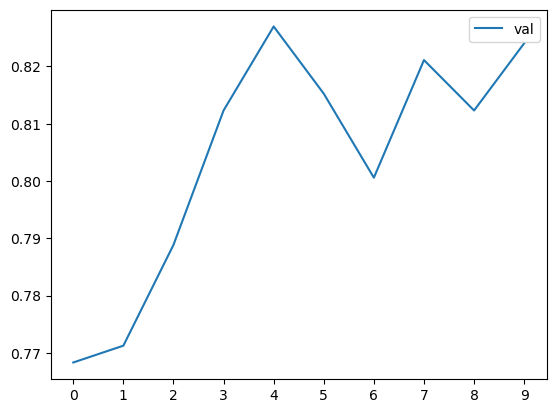

In [47]:
#plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

# 8.3 Adjusting the learning rate
- What's the learning rate
- Trying different values

In [48]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [49]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 100ms/step - accuracy: 0.1992 - loss: 2.3101 - val_accuracy: 0.4985 - val_loss: 1.6289
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5209 - loss: 1.5061 - val_accuracy: 0.6129 - val_loss: 1.2658
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6157 - loss: 1.2156 - val_accuracy: 0.6628 - val_loss: 1.0765
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6814 - loss: 1.0468 - val_accuracy: 0.6979 - val_loss: 0.9665
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7138 - loss: 0.9220 - val_accuracy: 0.7273 - val_loss: 0.8897
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7171 - loss: 0.8704 - val_accuracy: 0.7478 - val_loss: 0.8383
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7413 - loss: 0.7993 - val_accuracy: 0.7683 - val_loss: 0.7959
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.7476 - loss: 0.7832 - val_accuracy: 0

In [51]:
del scores[0.1]
del scores[0.0001]

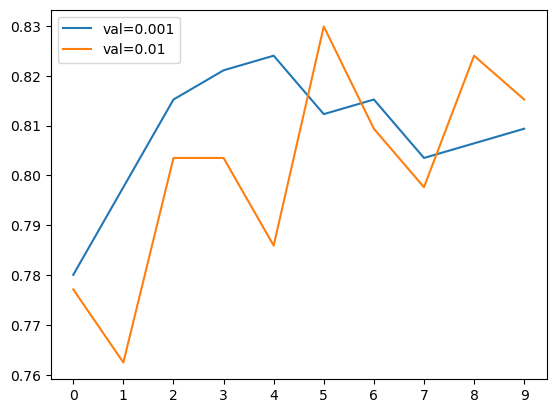

In [52]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [53]:
learning_rate = 0.001

# 8.4 Checkpointing
- Saving the best model only
- Training a model with callbacks

In [92]:
# model.get_weights()

In [72]:
model.save('model_v1.keras')

In [73]:
!ls

clothing-dataset-small	model_v1.keras
model_v1.h5		notebook_deeplearning.ipynb


In [79]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',  # Save in .keras format
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [81]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 0.5205 - loss: 1.4404 - val_accuracy: 0.7478 - val_loss: 0.7440
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.7903 - loss: 0.6216 - val_accuracy: 0.8182 - val_loss: 0.6090
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8441 - loss: 0.4938 - val_accuracy: 0.8182 - val_loss: 0.5863
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.8762 - loss: 0.4132 - val_accuracy: 0.8123 - val_loss: 0.5638
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.8806 - loss: 0.3873 - val_accuracy: 0.8240 - val_loss: 0.5383
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.9097 - loss: 0.3225 - val_accuracy: 0.8387 - val_loss: 0.5527
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9256 - loss: 0.2917 - val_accuracy: 0.8182 - val_loss: 0.5252
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9383 - loss: 0.2497 - val_accuracy: 0.8240 -

In [84]:
!ls #best model is 06

clothing-dataset-small	notebook_deeplearning.ipynb  xception_v1_05_0.824.keras
model_v1.h5		xception_v1_01_0.748.keras   xception_v1_06_0.839.keras
model_v1.keras		xception_v1_02_0.818.keras


In [85]:
# delete what is not needed

In [86]:
!rm model_v1.h5 model_v1.keras 

In [88]:
!rm xception_v1_01_0.748.keras xception_v1_02_0.818.keras xception_v1_05_0.824.keras

In [91]:
!ls #only the best model - xception_v1_06_0.839.keras

clothing-dataset-small	notebook_deeplearning.ipynb  xception_v1_06_0.839.keras


# 8.5 Adding more layers
- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [93]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    # ---- extra layer ----
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [94]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - accuracy: 0.3795 - loss: 1.8353 - val_accuracy: 0.6950 - val_loss: 0.9953
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7079 - loss: 0.8792 - val_accuracy: 0.7507 - val_loss: 0.7452
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.7942 - loss: 0.6268 - val_accuracy: 0.7918 - val_loss: 0.6259
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8421 - loss: 0.4936 - val_accuracy: 0.7918 - val_loss: 0.6156
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8642 - loss: 0.4333 - val_accuracy: 0.7859 - val_loss: 0.6049
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8913 - loss: 0.3666 - val_accuracy: 0.8065 - val_loss: 0.5562
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9104 - loss: 0.3181 - val_accuracy: 0.7947 - val_loss: 0.5567
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9227 - loss: 0.2840 - val_accuracy: 0.794

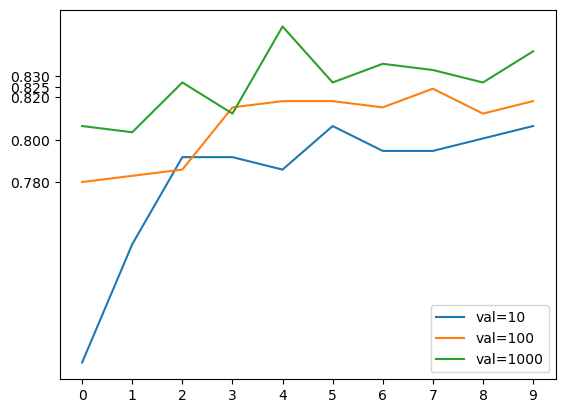

In [95]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

- It is does not seem like adding an extra layer improved the model. We already have a model around 0.84 accuracy

# 8.6 Regularization and dropout
- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [97]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    # --- adding extra layer ---------
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    # --------------------------------
    
    # --- adding a dropout layer ----
    drop = keras.layers.Dropout(droprate)(inner)
    # --------------------------------
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [98]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 0.5694 - loss: 1.2873 - val_accuracy: 0.7947 - val_loss: 0.6336
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8095 - loss: 0.5262 - val_accuracy: 0.8094 - val_loss: 0.5610
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8841 - loss: 0.3484 - val_accuracy: 0.8152 - val_loss: 0.5889
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9275 - loss: 0.2313 - val_accuracy: 0.8094 - val_loss: 0.5664
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9605 - loss: 0.1618 - val_accuracy: 0.8299 - val_loss: 0.5878
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9764 - loss: 0.1174 - val_accuracy: 0.8270 - val_loss: 0.5840
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9861 - loss: 0.0831 - val_accuracy: 0.8328 - val_loss: 0.5599
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9962 - loss: 0.0523 - val_accuracy: 0.82

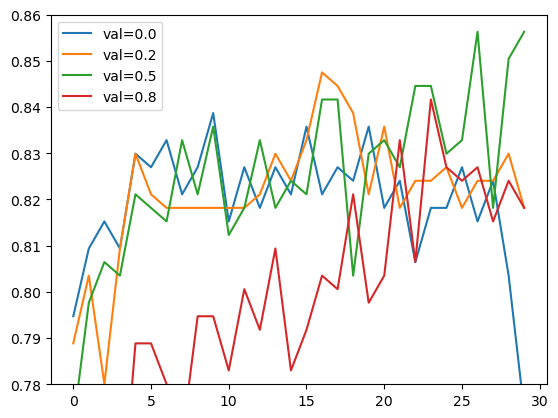

In [99]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

- it seems no (0.0) drop out and to much (0.8) are bad for the model 

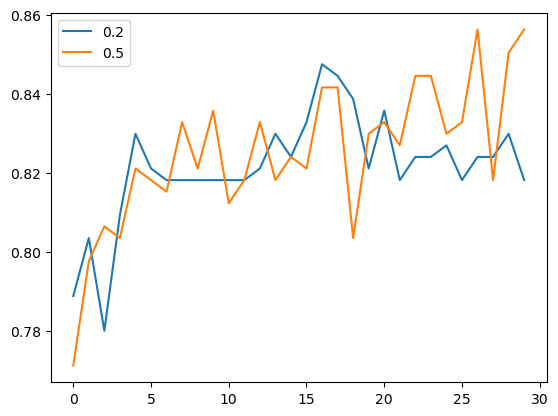

In [101]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

- dropout of 50% look like a good "freeze", let's check train/val

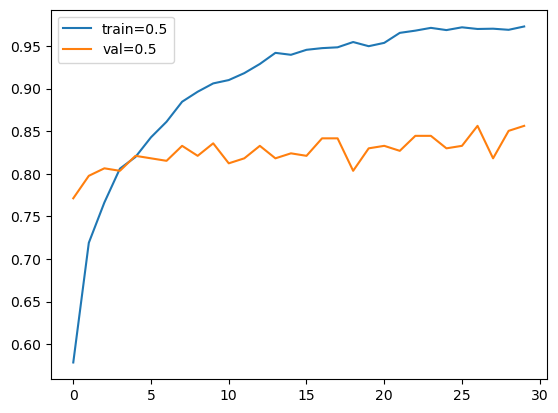

In [108]:
droprate = 0.5
hist = scores[0.5]
plt.plot(hist['accuracy'], label=('train=%s' % droprate))
plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.legend()

# 8.7 Data augmentation
- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?

In [110]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [111]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 110ms/step - accuracy: 0.5506 - loss: 1.3762 - val_accuracy: 0.7947 - val_loss: 0.6475
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.7675 - loss: 0.6297 - val_accuracy: 0.8006 - val_loss: 0.6109
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.8345 - loss: 0.4827 - val_accuracy: 0.7859 - val_loss: 0.6037
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8749 - loss: 0.3628 - val_accuracy: 0.7977 - val_loss: 0.5522
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8982 - loss: 0.2898 - val_accuracy: 0.8035 - val_loss: 0.6431
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.9218 - loss: 0.2439 - val_accuracy: 0.8065 - val_loss: 0.5781
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9365 - loss: 0.1987 - val_accuracy: 0.8299 - val_loss: 0.5656
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9601 - loss: 0.1485 - val_accuracy: 0.8152 - val_loss: 

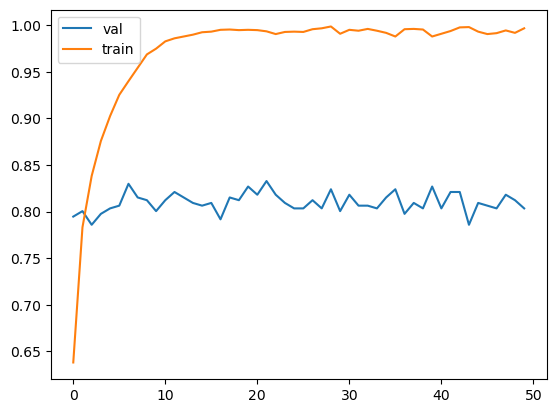

In [112]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

# 8.8 Training a larger model
- Train a 299x299 model

In [114]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [115]:
input_size = 299

In [116]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [119]:
!ls

clothing-dataset-small	notebook_deeplearning.ipynb  xception_v1_06_0.839.keras


In [120]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v3_{epoch:02d}_{val_accuracy:.3f}.keras',  # Save in .keras format
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [123]:
#!pip install scipy

In [124]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50


E0000 00:00:1732723017.605391    1850 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732723017.894609    1850 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732723020.425365    1850 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732723020.658960    1850 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2024-11-27 15:57:02.391946: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 17.43GiB with freed_by_count=0. The caller indicates that th

18/96 ━━━━━━━━━━━━━━━━━━━━ 40s 524ms/step - accuracy: 0.3435 - loss: 2.0071

E0000 00:00:1732723042.008327    1851 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732723042.238647    1851 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732723042.583465    1851 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732723042.852350    1851 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732723043.982747    1851 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - accuracy: 0.5686 - loss: 1.3801

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
E0000 00:00:1732723105.762831    1851 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732723105.987493    1851 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732723106.287703    1851 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1

96/96 ━━━━━━━━━━━━━━━━━━━━ 108s 915ms/step - accuracy: 0.5699 - loss: 1.3759 - val_accuracy: 0.8270 - val_loss: 0.5601
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 615ms/step - accuracy: 0.8261 - loss: 0.5170 - val_accuracy: 0.8622 - val_loss: 0.4503
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 609ms/step - accuracy: 0.8492 - loss: 0.4546 - val_accuracy: 0.8563 - val_loss: 0.4312
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 614ms/step - accuracy: 0.8769 - loss: 0.3677 - val_accuracy: 0.8651 - val_loss: 0.4003
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 614ms/step - accuracy: 0.8847 - loss: 0.3509 - val_accuracy: 0.8739 - val_loss: 0.3826
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 612ms/step - accuracy: 0.8869 - loss: 0.3258 - val_accuracy: 0.8886 - val_loss: 0.3725
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 611ms/step - accuracy: 0.8991 - loss: 0.2914 - val_accuracy: 0.8768 - val_loss: 0.3743
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 59s 611ms/step - accuracy: 0.9102 - loss: 0.2684 - val_accuracy: 0.86

KeyboardInterrupt: 

In [125]:
!ls

clothing-dataset-small	     xception_v3_02_0.862.keras
notebook_deeplearning.ipynb  xception_v3_04_0.865.keras
xception_v1_06_0.839.keras   xception_v3_05_0.874.keras
xception_v3_01_0.827.keras   xception_v3_06_0.889.keras


In [127]:
# removing the worst big models

In [126]:
!rm xception_v3_01_0.827.keras xception_v3_02_0.862.keras xception_v3_04_0.865.keras xception_v3_05_0.874.keras

In [128]:
!ls

clothing-dataset-small	     xception_v1_06_0.839.keras
notebook_deeplearning.ipynb  xception_v3_06_0.889.keras


# 8.9 Using the model
- Loading the model
- Evaluating the model
- Getting predictions

In [129]:
# import test data

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [130]:
model = keras.models.load_model('xception_v3_06_0.889.keras')

In [131]:
model.evaluate(test_ds)

11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.8694 - loss: 0.4304

E0000 00:00:1732724007.291961    1850 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732724007.516063    1850 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732724007.810127    1850 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732724008.041352    1850 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1732724008.888096    1850 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000

12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8738 - loss: 0.4113 


[0.3061622977256775, 0.897849440574646]

In [132]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [133]:
img = load_img(path, target_size=(299, 299))

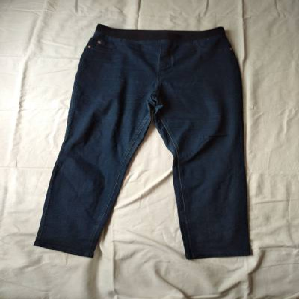

In [136]:
img

In [134]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [135]:
X = preprocess_input(X)

In [137]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [138]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

- model predicts to be pants (pants': 9.350176)

In [142]:
dict(zip(classes, pred[0]))

{'dress': -1.5690523,
 'hat': -1.0280366,
 'longsleeve': -0.5364304,
 'outwear': -0.24635369,
 'pants': 9.350176,
 'shirt': -0.5737785,
 'shoes': -2.6829157,
 'shorts': 4.1275206,
 'skirt': -1.2103772,
 't-shirt': -2.1772733}